In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pyproj import Transformer
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import folium

In [2]:
land_coordinates = [
   (6.837048821809467,80.00922751998658),
   (6.83702751672801,80.00962985133881),
   (6.837181978547067,80.010563260076),
   (6.836628046274787,80.010563260076),
   (6.836489563106396,80.01037014102693),
   (6.836430974061537,80.00984979247804),
   (6.836185965250661,80.00964058017487),
   (6.836324448507013,80.00951183414216),
   (6.837048821809467,80.00922751998658) 
 
]

In [3]:
def calculate_land_area(latitude_longitude_coordinates):
  
    transformer = Transformer.from_crs('epsg:4326', 'epsg:3857')

    try:
       
        x_coords, y_coords = transformer.transform(*zip(*latitude_longitude_coordinates))

        
        polygon = Polygon(zip(x_coords, y_coords))

        
        plot_land(polygon)

    
        area_meters = polygon.area

            
        min_x, max_x = min(x_coords), max(x_coords)
        min_y, max_y = min(y_coords), max(y_coords)

    
        plot_satellite_image(min_x, max_x, min_y, max_y)

        
        area_perches = area_meters / 25.2929
        area_acres = area_meters * 0.000247105

        return area_meters, area_perches, area_acres
    except Exception as e:
        print("Error occurred during area calculation:", e)
        return None

In [4]:
def plot_land(polygon):
    
    x, y = polygon.exterior.xy

    
    plt.figure()
    plt.plot(x, y, color='b')
    plt.fill(x, y, color='lightblue', alpha=0.5)
    plt.title('Land Plot')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


In [5]:
def plot_satellite_image(min_x, max_x, min_y, max_y):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

    
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.Mercator())

    
    plt.show()

In [6]:
def calculate_area(x_coords, y_coords):
    
    area_meters = (max(x_coords) - min(x_coords)) * (max(y_coords) - min(y_coords))
    return area_meters

In [7]:
def display_satellite_image(latitude_longitude_coordinates):
    
    center_latitude = sum(coord[1] for coord in latitude_longitude_coordinates) / len(latitude_longitude_coordinates)
    center_longitude = sum(coord[0] for coord in latitude_longitude_coordinates) / len(latitude_longitude_coordinates)


    m = folium.Map(location=[center_latitude, center_longitude], zoom_start=15, control_scale=True)

    
    folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                     attr='Esri', name='Esri Satellite', overlay=True).add_to(m)

    
    for coord in latitude_longitude_coordinates:
        folium.Marker(coord).add_to(m)

    
    display(m)


display_satellite_image(land_coordinates)

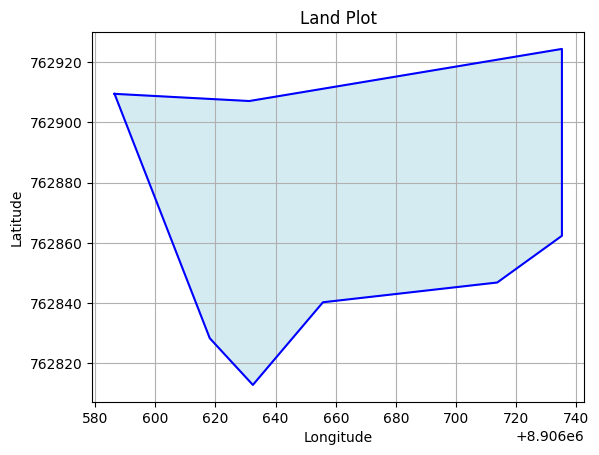

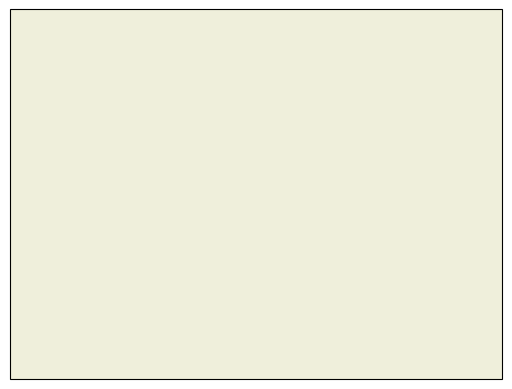

Land area:
  Square Meters: 10094.957779335828
  Perches: 399.1221955305966
  Acres: 2.4945145420627797


In [8]:
area_meters, area_perches, area_acres = calculate_land_area(land_coordinates)
if area_meters is not None:
    print("Land area:")
    print("  Square Meters:", area_meters)
    print("  Perches:", area_perches)
    print("  Acres:", area_acres)
else:
    print("Error: Unable to calculate land area.")